In [18]:
# Sentiment Classifier


re.sub(r'@[A-Za-z0-9]+', '', text)
re.sub(r'#', '', text)
re.sub(r'RT[\s]+', '', text)
re.sub(r'https?:\/\/\S+', '', text)

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import time
from sklearn import svm
from sklearn.metrics import classification_report
import pickle

In [20]:
df_fin_phrase = pd.read_csv("../../Data/Prepared/CleanDatasets/fin_phrase_bank_clean.csv")

In [21]:
df_fin_phrase.head(5)

,sentence,label,clean_text,sentiment
0,"According to Gran , the company has no plans t...",1,according gran company plan move production ru...,Neutral
1,Technopolis plans to develop in stages an area...,1,technopolis plan develop stage area le square ...,Neutral
2,The international electronic industry company ...,0,international electronic industry company elco...,Negative
3,With the new production plant the company woul...,2,new production plant company would increase ca...,Positive
4,According to the company 's updated strategy f...,2,according company updated strategy year baswar...,Positive


In [22]:
df_fin_phrase['sentiment'].value_counts()

sentiment
Neutral     2879
Positive    1363
Negative     604
Name: count, dtype: int64

In [23]:
df_fin_phrase.dropna(inplace=True)

## Simple Random Sample

In [24]:
df_randomised = df_fin_phrase.sample(frac=1)

In [25]:
train_rate = 0.90

In [26]:
df_train = df_randomised[:int(len(df_randomised) * train_rate)]
df_train

,sentence,label,clean_text,sentiment
3748,Stora is due to release its fourth-quarter and...,1,stora due release fourth quarter full year ear...,Neutral
2328,28 January 2011 - Finnish technology center op...,1,january finnish technology center operator tec...,Neutral
4077,The tightened competition situation in the pro...,0,tightened competition situation production aut...,Negative
413,4 ) Complete name of the shareholder : Otto He...,1,complete name shareholder otto henrik bernhard...,Neutral
1167,"Also , a six-year historic analysis is provide...",1,also six year historic analysis provided market,Neutral
...,...,...,...,...
4260,The largest restructuring is planned for Italy...,0,largest restructuring planned italy negotiatio...,Negative
2933,Helsinki 19 May 2010 - Finnish company Lemmink...,1,helsinki may finnish company lemminkainen oyj ...,Neutral
4394,"During the strike , Finnair estimates to incur...",0,strike finnair estimate incur net loss eur eur...,Negative
2410,As part of the reorganisation measures that wi...,0,part reorganisation measure take place spring ...,Negative


In [27]:
df_val = df_randomised[int(len(df_randomised) * train_rate):]
df_val

,sentence,label,clean_text,sentiment
3640,"In the Czech Republic , the profiling unit at ...",1,czech republic profiling unit ostrava closed m...,Neutral
2001,A & euro ; 4.8 million investment in 13.6 % of...,2,euro million investment lewa netted deutsche b...,Positive
4187,EB announced in its stock exchange release on ...,0,eb announced stock exchange release november t...,Negative
3600,"For 2009 , net profit was EUR3m and the compan...",1,net profit eur company paid dividend eur apiece,Neutral
635,The Vuokatti unit will be developed to focus e...,1,vuokatti unit developed focus especially manuf...,Neutral
...,...,...,...,...
1148,Finnish Suominen Corporation that makes wet wi...,0,finnish suominen corporation make wet wipe non...,Negative
2689,There have been 15 initial public offerings an...,1,initial public offering announced sweden year ...,Neutral
4834,Hobby Hall 's sales decrease 26 pct due to imp...,0,hobby hall sale decrease pct due implementing ...,Negative
4677,Finnish glass technology company Glaston Oyj A...,0,finnish glass technology company glaston oyj a...,Negative


In [28]:

# Create feature vectors
vectorizer = TfidfVectorizer()


In [29]:
train_vectors = vectorizer.fit_transform(df_train['clean_text'])
test_vectors = vectorizer.transform(df_val['clean_text'])

In [30]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df_train['sentiment'].values)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [31]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df_val[['sentiment']].values, prediction_linear, output_dict=True)

Training time: 1.478134s; Prediction time: 0.107814s


In [32]:
print('neutral: ', report['Neutral'])
print('negative: ', report['Negative'])
print('positive: ', report['Positive'])

neutral:  {'precision': 0.7214076246334311, 'recall': 0.9144981412639405, 'f1-score': 0.8065573770491803, 'support': 269.0}
negative:  {'precision': 0.7906976744186046, 'recall': 0.4594594594594595, 'f1-score': 0.5811965811965812, 'support': 74.0}
positive:  {'precision': 0.7029702970297029, 'recall': 0.5, 'f1-score': 0.5843621399176955, 'support': 142.0}


In [33]:
sentences = ['growth is strong and we have plenty of liquidity.', 
               'there is a shortage of capital, and we need extra financing.', 
              'formulation patents might protect Vasotec to a limited extent.']
for sen in sentences:
    sentences_vector = vectorizer.transform([sen]) # vectorizing
    print(classifier_linear.predict(sentences_vector))

['Positive']
['Neutral']
['Neutral']


In [34]:
df_stratified_train, df_stratified_val = train_test_split(df_fin_phrase, test_size=0.10, stratify=df_fin_phrase[['sentiment']].values)

In [35]:
df_stratified_train

,sentence,label,clean_text,sentiment
510,The company plans to expand into the internati...,2,company plan expand international market subsi...,Positive
3223,The contracts between Raute Corporation and Mu...,1,contract raute corporation muling kemian wood ...,Neutral
560,Basware Corporation stock exchange release Aug...,2,basware corporation stock exchange release aug...,Positive
235,Net interest income increased by 4.5 % to EUR ...,2,net interest income increased eur mn eur mn,Positive
345,"ADP News - Nov 18 , 2008 - Finnish AC drives m...",2,adp news nov finnish ac drive manufacturer vac...,Positive
...,...,...,...,...
3946,There have not been previous share subscriptio...,1,previous share subscription stock option,Neutral
228,"( ADP News ) - Feb 12 , 2009 - Finnish IT solu...",2,adp news feb finnish solution provider affecto...,Positive
478,Aspocomp intends to set up a plant to manufact...,1,aspocomp intends set plant manufacture printed...,Neutral
4644,"Revenue for the quarter totaled 27.4 billion ,...",0,revenue quarter totaled billion percent billio...,Negative


In [36]:
df_stratified_val

,sentence,label,clean_text,sentiment
699,Salonen added that data shows producers ' pulp...,0,salonen added data show producer pulp inventor...,Negative
3206,The company serves customers in various indust...,1,company serf customer various industry includi...,Neutral
2158,Net sales are expected to remain on the same l...,1,net sale expected remain level,Neutral
4660,"Finnish shipping company Finnlines , of the Gr...",0,finnish shipping company finnlines grimaldi gr...,Negative
1421,The service developed by Digia facilitates the...,1,service developed digia facilitates work resou...,Neutral
...,...,...,...,...
3128,"Sponda is a property investment company , spec...",1,sponda property investment company specialisin...,Neutral
4036,"Operating loss totalled EUR 12.7 mn , compared...",0,operating loss totalled eur mn compared profit...,Negative
1144,Finnish beverage company Olvi is introducing a...,1,finnish beverage company olvi introducing new ...,Neutral
1838,"Chic and cheerful , Finnish design house Marim...",1,chic cheerful finnish design house marimekko s...,Neutral


In [49]:
train_vectors = vectorizer.fit_transform(df_stratified_train['clean_text'])
test_vectors = vectorizer.transform(df_stratified_val['clean_text'])
test_true = df_stratified_val[['sentiment']].values

In [38]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df_stratified_train['sentiment'].values)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [39]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df_stratified_val[['sentiment']].values, prediction_linear, output_dict=True)

Training time: 1.316930s; Prediction time: 0.109335s


In [40]:
print('neutral: ', report['Neutral'])
print('negative: ', report['Negative'])
print('positive: ', report['Positive'])

neutral:  {'precision': 0.764179104477612, 'recall': 0.8888888888888888, 'f1-score': 0.8218298555377207, 'support': 288.0}
negative:  {'precision': 0.7608695652173914, 'recall': 0.5737704918032787, 'f1-score': 0.6542056074766355, 'support': 61.0}
positive:  {'precision': 0.6923076923076923, 'recall': 0.5294117647058824, 'f1-score': 0.6, 'support': 136.0}


In [41]:
sentences = ['growth is strong and we have plenty of liquidity.', 
               'there is a shortage of capital, and we need extra financing.', 
              'formulation patents might protect Vasotec to a limited extent.']
for sen in sentences:
    sentences_vector = vectorizer.transform([sen]) # vectorizing
    print(classifier_linear.predict(sentences_vector).prod())

Positive
Neutral
Neutral


In [42]:
result=classifier_linear.predict(sentences_vector)

In [43]:
result.view()

array(['Neutral'], dtype=object)

# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier_linear, open('classifier.sav', 'wb')

# Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
class_names = sorted(df_train.label.unique())
class_names

[0, 1, 2]

In [47]:
prediction_linear.shape

(485,)

In [50]:
test_true.shape

(485, 1)

In [51]:
cm = confusion_matrix(test_true,prediction_linear )

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 30, ha='right')
    plt.ylabel('True Sentiment')
    plt.xlabel('Predicted Sentiment')

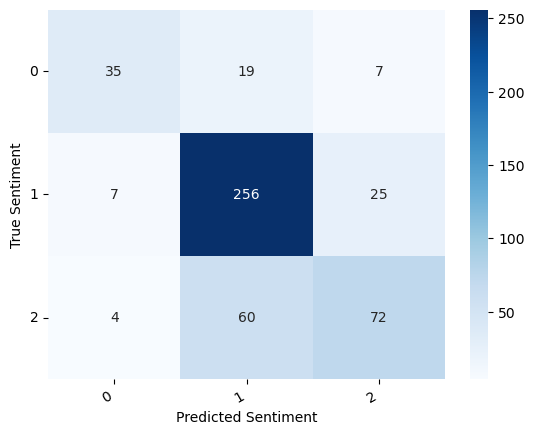

In [53]:
df_cm = pd.DataFrame(cm, index=class_names, columns = class_names)
show_confusion_matrix(df_cm)